#Data Loading

In [ ]:
!git clone https://github.com/theochem/B3DB

Cloning into 'B3DB'...
remote: Enumerating objects: 284, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 284 (delta 8), reused 3 (delta 1), pack-reused 265 (from 1)
Receiving objects: 100% (284/284), 162.98 MiB | 16.25 MiB/s, done.
Resolving deltas: 100% (100/100), done.


In [ ]:
import pandas as pd

classification_data = pd.read_csv("/content/B3DB/B3DB/B3DB_classification.tsv", sep="\t")
classification_data_extended = pd.read_csv("/content/B3DB/B3DB/B3DB_classification_extended.tsv.gz", sep="\t", compression="gzip")


/tmp/ipython-input-2-766169635.py:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  classification_data_extended = pd.read_csv("/content/B3DB/B3DB/B3DB_classification_extended.tsv.gz", sep="\t", compression="gzip")


#EDA and Data Cleaning

In [ ]:
classification_data.shape

(7807, 12)

In [ ]:
classification_data_extended.shape

(7807, 1625)

In [ ]:
classification_data.columns

Index(['NO.', 'compound_name', 'IUPAC_name', 'SMILES', 'CID', 'logBB',
       'BBB+/BBB-', 'Inchi', 'threshold', 'reference', 'group', 'comments'],
      dtype='object')

In [ ]:
df = classification_data_extended

In [ ]:
df.describe()

,NO.,CID,logBB,threshold,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
count,7807.000000,6.170000e+03,1058.000000,3621.0,7807.000000,7807.000000,7807.000000,7807.000000,7797.000000,7797.000000,...,7807.000000,7807.000000,7807.000000,7807.000000,7.807000e+03,7807.000000,7807.000000,7807.000000,7800.000000,7807.000000
mean,3904.000000,2.082453e+07,-0.077873,-1.0,20.936784,16.974609,0.214935,0.677597,34.032968,2.499863,...,10.211636,70.859232,385.035739,7.616997,6.099932e+07,47.132573,144.137313,173.705521,9.912709,5.883298
std,2253.831109,3.580294e+07,0.751623,0.0,9.441971,6.706245,0.585430,0.929318,15.044475,0.182698,...,0.834547,17.515823,170.733951,2.415272,4.310903e+09,26.063792,66.774481,83.349697,5.129713,2.597268
min,1.000000,1.100000e+01,-2.690000,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,7.016005,3.206260,0.000000e+00,0.000000,0.000000,0.000000,0.750000,0.000000
25%,1952.500000,2.542200e+04,-0.535000,-1.0,15.492048,13.041353,0.000000,0.000000,25.572188,2.409622,...,9.888374,59.910817,285.079568,6.660752,7.820000e+02,31.000000,104.000000,121.000000,6.633681,4.416667
50%,3904.000000,9.314170e+05,-0.020000,-1.0,19.993908,16.150871,0.000000,1.000000,32.595631,2.500142,...,10.310452,71.730916,362.103335,7.243813,1.541000e+03,43.000000,138.000000,165.000000,8.701389,5.569444
75%,5855.500000,1.793498e+07,0.420000,-1.0,24.743058,19.811292,0.000000,1.000000,39.888683,2.628402,...,10.721967,80.982453,451.264213,8.102851,2.709000e+03,59.000000,174.000000,212.500000,11.944444,6.777778
max,7807.000000,1.547351e+08,1.700000,-1.0,103.849824,79.433831,8.000000,10.000000,169.080886,2.982174,...,11.953120,196.846273,1881.070533,131.904154,3.782000e+11,261.000000,716.000000,862.000000,53.444444,30.222222


In [ ]:
df1 = df[['logBB', 'BBB+/BBB-']]

In [ ]:
df1.head()

,logBB,BBB+/BBB-
0,-2.69,BBB-
1,-2.52,BBB-
2,-2.40,BBB-
3,-2.15,BBB-
4,-2.15,BBB-


/tmp/ipython-input-10-2329965536.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


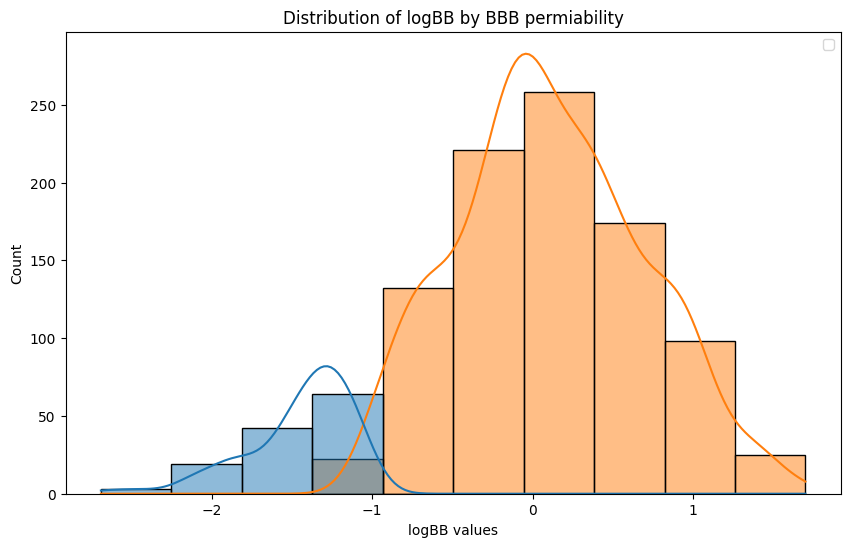

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='logBB', hue='BBB+/BBB-', kde=True, bins=10)
plt.title('Distribution of logBB by BBB permiability')
plt.xlabel('logBB values')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
df1.logBB.isnull().value_counts()

,count
logBB,
True,6749
False,1058


In [ ]:
df1['BBB+/BBB-'].isnull().value_counts()

,count
BBB+/BBB-,
False,7807


In [ ]:
null_counts = df.isnull().sum()
columns_with_more_than_100_nulls = null_counts[null_counts > 100]

print("Columns with more than 100 missing values:")
print(columns_with_more_than_100_nulls)
print(f"\nNumber of columns with more than 100 missing values: {len(columns_with_more_than_100_nulls)}")

Columns with more than 100 missing values:
compound_name    1109
IUPAC_name       1637
CID              1637
logBB            6749
threshold        4186
                 ... 
MDEN-12          6687
MDEN-13          6854
MDEN-22          5807
MDEN-23          5080
MDEN-33          6261
Length: 330, dtype: int64

Number of columns with more than 100 missing values: 330


In [ ]:
threshold_percentage = 0.70
min_count = (1 - threshold_percentage) * len(df)
mdf = df.dropna(axis=1, thresh=min_count).copy()

print(f"Shape of df before dropping columns with >{threshold_percentage*100}% missing values: {df.shape}")
print(f"Shape of mdf after dropping columns: {mdf.shape}")

Shape of df before dropping columns with >70.0% missing values: (7807, 1625)
Shape of mdf after dropping columns: (7807, 1482)


In [ ]:
mdf_numeric = mdf.select_dtypes(include=['number'])

In [ ]:
variances = mdf_numeric.var()

print("\nSummary statistics of variances:")
display(variances.describe())


Summary statistics of variances:


,0
count,1.475000e+03
mean,1.268280e+16
std,4.838914e+17
min,0.000000e+00
25%,1.591804e-02
50%,3.274096e-01
75%,6.336206e+01
max,1.858389e+19


In [ ]:
low_variance_cols = mdf_numeric.var()[(mdf_numeric.var() <1e-3)].index.tolist()
mdf['label'] = mdf['BBB+/BBB-'].map({'BBB+': 1, 'BBB-': 0})
mdf = mdf.select_dtypes(include=['number'])

mdf = mdf.drop(columns=low_variance_cols,)

print(f"Columns dropped due to low variance: {low_variance_cols}")
print(f"Shape of mdf after dropping low variance columns: {mdf.shape}")

Columns dropped due to low variance: ['threshold', 'nB', 'AATSC0c', 'AATSC1c', 'AATSC2c', 'AATSC3c', 'AATSC4c', 'AATSC5c', 'AATSC6c', 'AATSC7c', 'AATSC8c', 'AATSC1se', 'AATSC2se', 'AATSC3se', 'AATSC4se', 'AATSC5se', 'AATSC6se', 'AATSC7se', 'AATSC8se', 'AATSC1pe', 'AATSC2pe', 'AATSC3pe', 'AATSC4pe', 'AATSC5pe', 'AATSC6pe', 'AATSC7pe', 'AATSC1are', 'AATSC2are', 'AATSC3are', 'AATSC4are', 'AATSC5are', 'AATSC6are', 'AATSC7are', 'AATSC1p', 'AXp-0d', 'AXp-1d', 'AXp-3d', 'AXp-4d', 'AXp-5d', 'AXp-6d', 'AXp-7d', 'AXp-3dv', 'AXp-4dv', 'AXp-5dv', 'AXp-6dv', 'AXp-7dv', 'Mse', 'Mi', 'SM1_Dt', 'NsLi', 'NssBe', 'NssssBe', 'NssBH', 'NsssB', 'NssssB', 'NddC', 'NsNH3', 'NssNH2', 'NsssNH', 'NsSiH3', 'NssSiH2', 'NsssSiH', 'NssssSi', 'NsPH2', 'NssPH', 'NsssP', 'NsssssP', 'NdssS', 'NsGeH3', 'NssGeH2', 'NsssGeH', 'NssssGe', 'NsAsH2', 'NssAsH', 'NsssAs', 'NsssdAs', 'NsssssAs', 'NsSeH', 'NdSe', 'NssSe', 'NaaSe', 'NdssSe', 'NddssSe', 'NsSnH3', 'NssSnH2', 'NsssSnH', 'NssssSn', 'NsPbH3', 'NssPbH2', 'NsssPbH', 'Nss

In [ ]:
mdf.head()

,NO.,CID,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,label
0,1,5339.0,21.716720,16.307343,1,0,35.289886,2.380530,4.761059,35.289886,...,63.201012,398.068491,9.477821,2428,42,144,165,9.590278,6.097222,0
1,2,3889.0,27.965103,22.915028,4,0,45.430282,2.648849,5.297577,45.430282,...,87.033695,520.101247,9.287522,4114,62,194,237,13.756944,7.916667,0
2,3,2788.0,10.065904,8.927318,0,0,16.678194,2.425683,4.851365,16.678194,...,44.825548,304.910439,16.939469,218,21,68,81,4.805556,2.861111,0
3,4,14022517.0,13.503979,11.612996,0,3,23.641772,2.237342,4.474683,23.641772,...,50.610337,341.030979,9.743742,898,22,82,88,6.583333,4.694444,0
4,5,18595497.0,27.006116,19.957433,1,1,43.435426,2.709582,5.329713,43.435426,...,85.350582,461.168581,7.686143,2850,74,198,254,11.229167,6.847222,0


# Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
lr_df = mdf.copy()

In [ ]:
X = lr_df.drop('label', axis=1)
y = lr_df['label']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

X_imputed = X.fillna(X.mean())

print('\nTraget Variable Distribution:')
print(y.value_counts(normalize=True))

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTrain set size: {X_train.shape[0]} rows, {X_train.shape[1]} columns")
print(f"Test set size: {X_test.shape[0]} rows, {X_test.shape[1]} columns")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled successfully")

Shape of X: (7807, 1276)
Shape of y: (7807,)

Traget Variable Distribution:
label
1    0.634815
0    0.365185
Name: proportion, dtype: float64

Train set size: 6245 rows, 1276 columns
Test set size: 1562 rows, 1276 columns
Features scaled successfully


In [ ]:
model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)
print("Model Training Complete")

Model Training Complete


Logistic Regression Prefromance (Mean Imputation)
Accuracy 0.8796

CLassification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       570
           1       0.89      0.92      0.91       992

    accuracy                           0.88      1562
   macro avg       0.87      0.86      0.87      1562
weighted avg       0.88      0.88      0.88      1562

\Confusion Matrix:


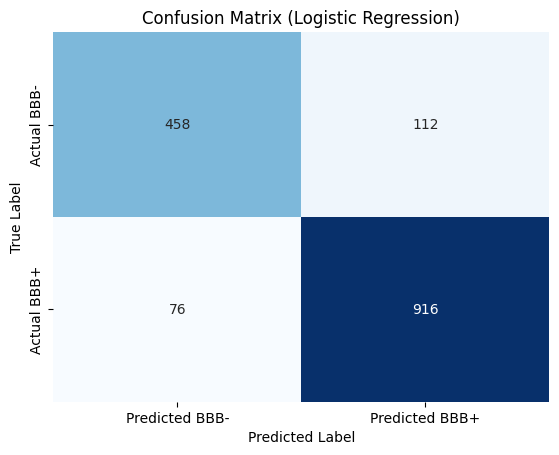


ROC AUC Score: 0.9374

Basic Model Trained


In [ ]:
y_pred = model.predict(X_test_scaled)

print("Logistic Regression Prefromance (Mean Imputation)")
accuracy=accuracy_score(y_test, y_pred)
print(f"Accuracy {accuracy:.4f}")
print("\nCLassification Report:")
print(classification_report(y_test, y_pred))
print("\Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted BBB-', 'Predicted BBB+'], yticklabels=['Actual BBB-', 'Actual BBB+'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

y_prob = model.predict_proba(X_test_scaled)[:,1]
roc_auc = roc_auc_score(y_test,y_prob)
print(f"\nROC AUC Score: {roc_auc:.4f}")

print("\nBasic Model Trained")

#MICE Imputation and XGB Classifier










In [ ]:
bg_df = mdf.copy()

In [ ]:
correlation_matrix = bg_df.corr()
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
  for j in range(i+1, len(correlation_matrix.columns)):
    if abs(correlation_matrix.iloc[i,j])>0.9:
      col1 = correlation_matrix.columns[i]
      col2 = correlation_matrix.columns[j]
      high_corr_pairs.append((col1, col2, correlation_matrix.iloc[i,j]))
if high_corr_pairs:
  print(f"Found {len(high_corr_pairs)} pairs with correlation > 0.9")
  for pair in high_corr_pairs[:10]:
    print(f" {pair[0]} and {pair[1]} : {pair[2]:.2f}")
else:
  print("No higly correlated pairs found above threshold")

Found 22624 pairs with correlation > 0.9
 ABC and ABCGG : 0.99
 ABC and SpAbs_A : 1.00
 ABC and SpAD_A : 1.00
 ABC and LogEE_A : 0.90
 ABC and nAtom : 0.96
 ABC and nHeavyAtom : 1.00
 ABC and nC : 0.95
 ABC and ATS0dv : 0.94
 ABC and ATS1dv : 0.96
 ABC and ATS2dv : 0.94


In [ ]:
bg_df.describe()

,NO.,CID,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,label
count,7807.000000,6.170000e+03,7807.000000,7807.000000,7807.000000,7807.000000,7797.000000,7797.000000,7797.000000,7797.000000,...,7807.000000,7807.000000,7807.000000,7.807000e+03,7807.000000,7807.000000,7807.000000,7800.000000,7807.000000,7807.000000
mean,3904.000000,2.082453e+07,20.936784,16.974609,0.214935,0.677597,34.032968,2.499863,4.945133,34.032968,...,70.859232,385.035739,7.616997,6.099932e+07,47.132573,144.137313,173.705521,9.912709,5.883298,0.634815
std,2253.831109,3.580294e+07,9.441971,6.706245,0.585430,0.929318,15.044475,0.182698,0.350716,15.044475,...,17.515823,170.733951,2.415272,4.310903e+09,26.063792,66.774481,83.349697,5.129713,2.597268,0.481513
min,1.000000,1.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,7.016005,3.206260,0.000000e+00,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000
25%,1952.500000,2.542200e+04,15.492048,13.041353,0.000000,0.000000,25.572188,2.409622,4.776882,25.572188,...,59.910817,285.079568,6.660752,7.820000e+02,31.000000,104.000000,121.000000,6.633681,4.416667,0.000000
50%,3904.000000,9.314170e+05,19.993908,16.150871,0.000000,1.000000,32.595631,2.500142,4.958639,32.595631,...,71.730916,362.103335,7.243813,1.541000e+03,43.000000,138.000000,165.000000,8.701389,5.569444,1.000000
75%,5855.500000,1.793498e+07,24.743058,19.811292,0.000000,1.000000,39.888683,2.628402,5.148124,39.888683,...,80.982453,451.264213,8.102851,2.709000e+03,59.000000,174.000000,212.500000,11.944444,6.777778,1.000000
max,7807.000000,1.547351e+08,103.849824,79.433831,8.000000,10.000000,169.080886,2.982174,5.754004,169.080886,...,196.846273,1881.070533,131.904154,3.782000e+11,261.000000,716.000000,862.000000,53.444444,30.222222,1.000000


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import time

X = bg_df.drop(['label','NO.'], axis=1).copy()
y = bg_df['label'].copy()

print("\nApplying MICE Imputer")
imputer = IterativeImputer(max_iter=10, random_state=42, n_nearest_features=50)
start_time = time.time()
X_imputed_array = imputer.fit_transform(X)
end_time = time.time()

X_imputed = pd.DataFrame(X_imputed_array, columns=X.columns, index=X.index)

print(f"MICE imputation completed in {end_time - start_time:.2f} seconds.")
print(f"Missing values after MICE: {X_imputed.isnull().sum().sum()}")


Applying MICE Imputer
MICE imputation completed in 49.31 seconds.
Missing values after MICE: 0


Applying XGBoost Classifier
Train set size: 6245 rows, 1275 columns
Test set size: 1562 rows, 1275 columns
Features Scaled Successfully
Training XGB Model


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:27:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_estimator", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Complete in 19.42 seconds.

XGB Model Performance (after Imputation)
Accuracy: 0.8969

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       570
           1       0.90      0.94      0.92       992

    accuracy                           0.90      1562
   macro avg       0.89      0.88      0.89      1562
weighted avg       0.90      0.90      0.90      1562


Confusion Matrix:


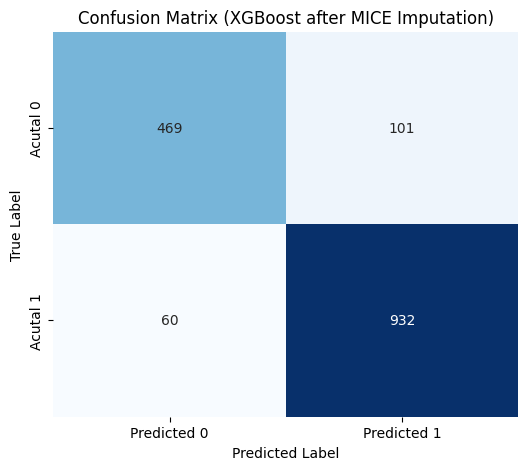


ROC AUC Score: 0.9622


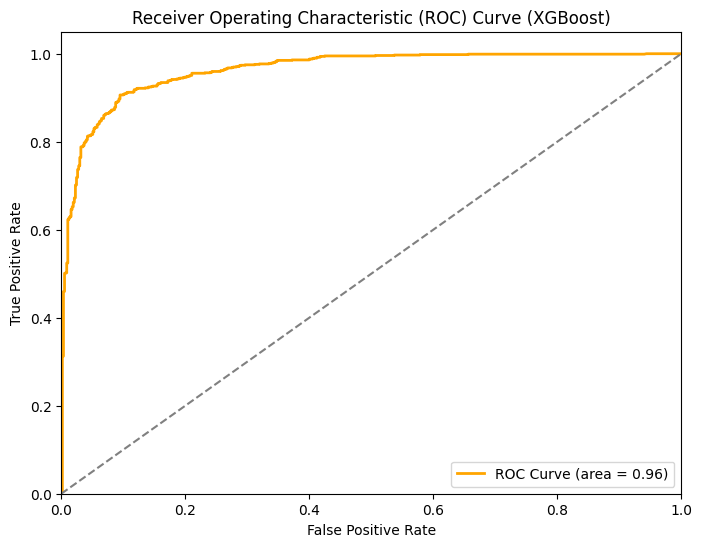

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

print("Applying XGBoost Classifier")
X_train, X_test, y_train, y_test = train_test_split( X_imputed, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train set size: {X_train.shape[0]} rows, {X_train.shape[1]} columns")
print(f"Test set size: {X_test.shape[0]} rows, {X_test.shape[1]} columns")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Features Scaled Successfully")

print("Training XGB Model")
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimator=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    random_state=42,
    n_jobs=-1
)

start_train_time = time.time()
model.fit(X_train_scaled_df, y_train)
end_train_time = time.time()

print(f"Training Complete in {end_train_time - start_train_time:.2f} seconds.")

y_pred = model.predict(X_test_scaled_df)
y_prob = model.predict_proba(X_test_scaled_df)[:,1]

print("\nXGB Model Performance (after Imputation)")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Acutal 0', 'Acutal 1'])
plt.title('Confusion Matrix (XGBoost after MICE Imputation)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (XGBoost)')
plt.legend(loc='lower right')
plt.show()

# Randomized Search CV


Starting RandomizedSearchCV with 50 iterations and 5 folds...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:14:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:14:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV completed in 2234.77 seconds.

Best hyperparameters found: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 1.0}
Best cross-validated ROC AUC score on training data: 0.9604

--- Tuned XGBoost Model Performance on Test Set ---
Accuracy: 0.9027

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       570
           1       0.91      0.94      0.92       992

    accuracy                           0.90      1562
   macro avg       0.90      0.89      0.89      1562
weighted avg       0.90      0.90      0.90      1562


Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:2676: UserWarning: [13:14:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:729: UserWarning: [13:14:13] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


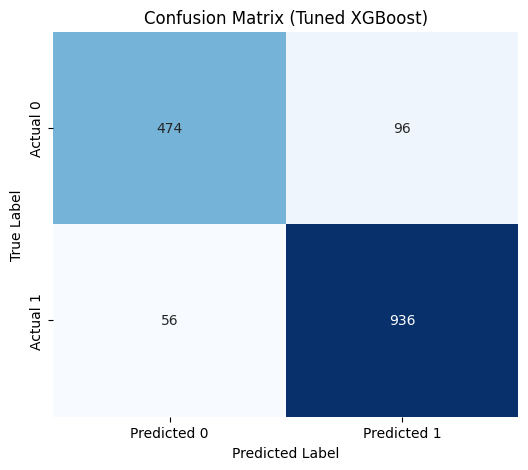


ROC AUC Score: 0.9657


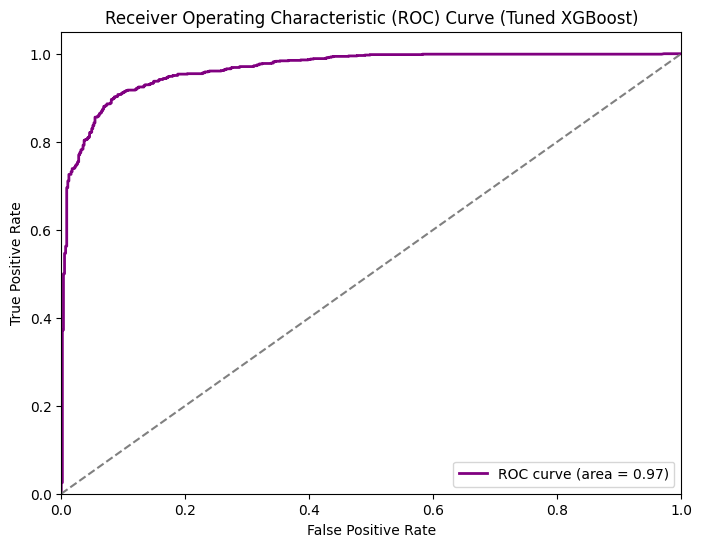

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1,
    tree_method='gpu_hist'
)

param_distributions = {
    'n_estimators': [100, 200, 300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 5, 7, 9, 11],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1],
    'reg_lambda': [0.5, 1, 1.5, 2]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

print(f"\nStarting RandomizedSearchCV with {random_search.n_iter} iterations and {random_search.cv} folds...")
start_tuning_time = time.time()
random_search.fit(X_train_scaled_df, y_train)
end_tuning_time = time.time()

print(f"RandomizedSearchCV completed in {end_tuning_time - start_tuning_time:.2f} seconds.")

best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"\nBest hyperparameters found: {best_params}")
print(f"Best cross-validated ROC AUC score on training data: {best_score:.4f}")

best_xgb_model = random_search.best_estimator_

y_pred_tuned = best_xgb_model.predict(X_test_scaled_df)
y_prob_tuned = best_xgb_model.predict_proba(X_test_scaled_df)[:, 1]

print("\n--- Tuned XGBoost Model Performance on Test Set ---")
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy: {accuracy_tuned:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))

print("\nConfusion Matrix:")
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned XGBoost)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

roc_auc_tuned = roc_auc_score(y_test, y_prob_tuned)
print(f"\nROC AUC Score: {roc_auc_tuned:.4f}")

fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, color='purple', lw=2, label=f'ROC curve (area = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Tuned XGBoost)')
plt.legend(loc="lower right")
plt.show()

#Feature Importance and Final Model assessment

--- Extracting and Analyzing Feature Importance from Tuned XGBoost Model ---

Top 20 Most Important Features:
          Feature  Importance
1227      TopoPSA    0.048172
3           nAcid    0.013373
1212   nG12FARing    0.013366
944     ETA_alpha    0.007111
291        ATSC4v    0.005895
7        SpDiam_A    0.005763
1028        Kier3    0.005393
1168      nAHRing    0.005236
714    SpDiam_Dzp    0.005179
1226  TopoPSA(NO)    0.004566
260        ATSC0s    0.004085
785         Xp-0d    0.003965
1143      n4HRing    0.003847
1158       nARing    0.003634
903        SssssN    0.003630
675   SpDiam_Dzse    0.003613
1221  nG12FAHRing    0.003580
61          ATS8s    0.003550
644       VR1_DzZ    0.003498
728      SpAD_Dzi    0.003302


/tmp/ipython-input-26-1195023618.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(n_top_features), palette='viridis')


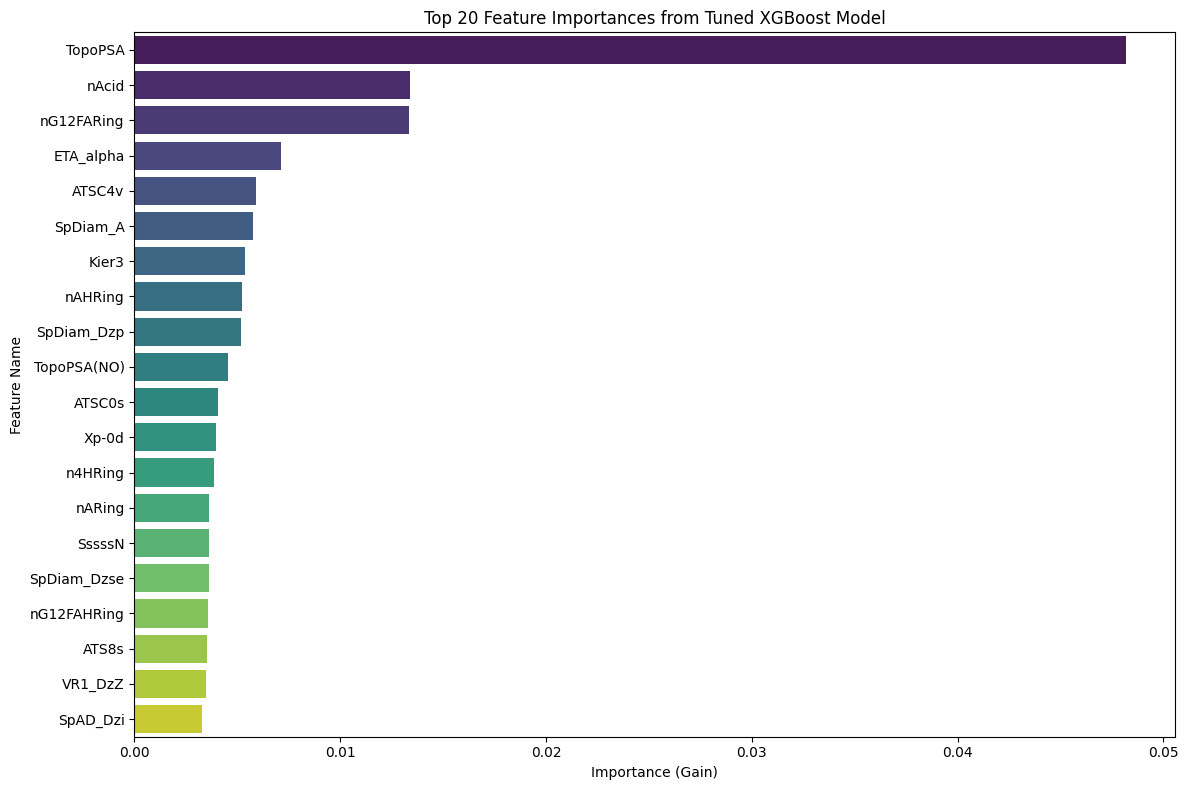

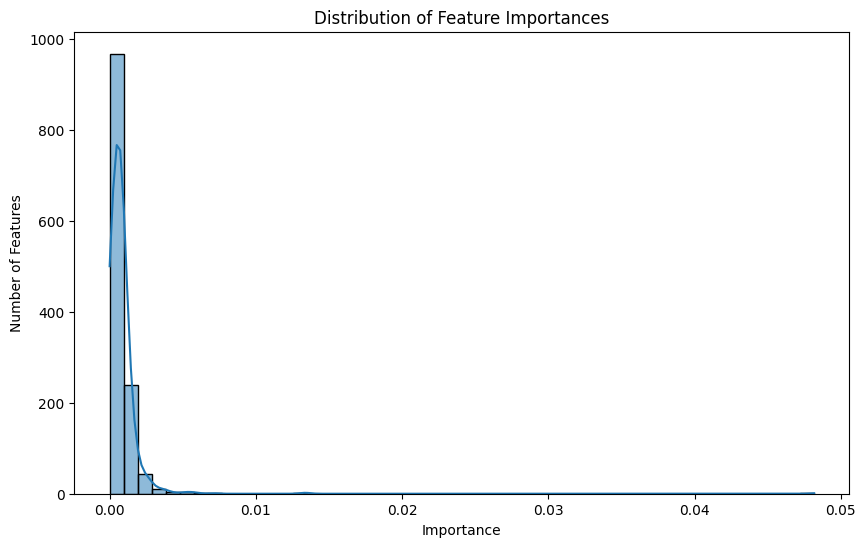


Feature importance analysis complete. The bar chart shows the most influential molecular descriptors.
Understanding these features can provide insights into the properties affecting BBB permeability.


In [ ]:
print("--- Extracting and Analyzing Feature Importance from Tuned XGBoost Model ---")

feature_importances = best_xgb_model.feature_importances_


importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})


importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 20 Most Important Features:")
print(importance_df.head(20))


n_top_features = 20

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(n_top_features), palette='viridis')
plt.title(f'Top {n_top_features} Feature Importances from Tuned XGBoost Model')
plt.xlabel('Importance (Gain)')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(importance_df['Importance'], bins=50, kde=True)
plt.title('Distribution of Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Number of Features')
plt.show()

print("\nFeature importance analysis complete. The bar chart shows the most influential molecular descriptors.")
print("Understanding these features can provide insights into the properties affecting BBB permeability.")

In [ ]:
print("\n--- Performing Feature Selection based on Importance ---")

n_top_features = 100

top_features_names = importance_df['Feature'].head(n_top_features).tolist()

print(f"Selected {n_top_features} top features for the reduced dataset.")
print("Example of top features selected (first 10):")
print(top_features_names[:10])


X_train_reduced_scaled_df = X_train_scaled_df[top_features_names]
X_test_reduced_scaled_df = X_test_scaled_df[top_features_names]

print(f"\nTraining set shape with reduced features: {X_train_reduced_scaled_df.shape}")
print(f"Test set shape with reduced features: {X_test_reduced_scaled_df.shape}")

print(f"\nRetraining Tuned XGBoost Model on {n_top_features} selected features using best parameters...")

best_params = {
    'subsample': 0.8,
    'reg_lambda': 2,
    'n_estimators': 300,
    'max_depth': 7,
    'learning_rate': 0.05,
    'gamma': 0.3,
    'colsample_bytree': 1.0
}

xgb_model_final_fs = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1,
    tree_method='hist',
    **best_params
)

start_final_train_time = time.time()
xgb_model_final_fs.fit(X_train_reduced_scaled_df, y_train)
end_final_train_time = time.time()


--- Performing Feature Selection based on Importance ---
Selected 100 top features for the reduced dataset.
Example of top features selected (first 10):
['TopoPSA', 'nAcid', 'nG12FARing', 'ETA_alpha', 'ATSC4v', 'SpDiam_A', 'Kier3', 'nAHRing', 'SpDiam_Dzp', 'TopoPSA(NO)']

Training set shape with reduced features: (6245, 100)
Test set shape with reduced features: (1562, 100)

Retraining Tuned XGBoost Model on 100 selected features using best parameters...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:40:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Final Tuned XGBoost Model Performance (on Reduced Features) ---
Accuracy: 0.8969

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       570
           1       0.90      0.94      0.92       992

    accuracy                           0.90      1562
   macro avg       0.90      0.88      0.89      1562
weighted avg       0.90      0.90      0.90      1562


Confusion Matrix:


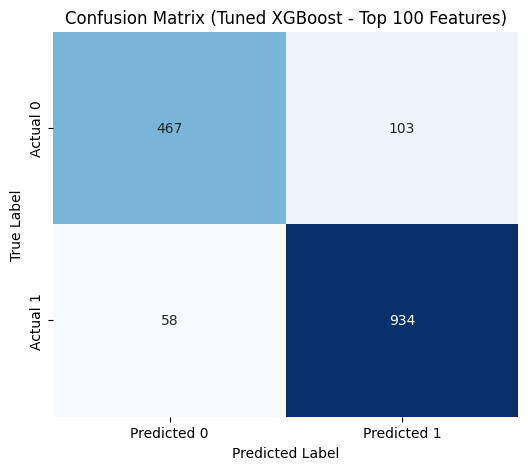


ROC AUC Score: 0.9589


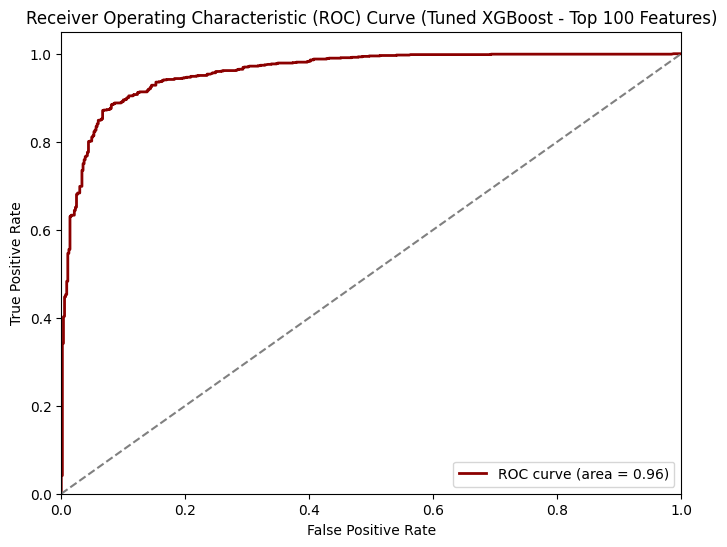


Model trained and evaluated on the top 100 features.


In [ ]:
print("\n--- Final Tuned XGBoost Model Performance (on Reduced Features) ---")

y_pred = xgb_model_final_fs.predict(X_test_reduced_scaled_df)
y_prob= xgb_model_final_fs.predict_proba(X_test_reduced_scaled_df)[:, 1]


accuracy_final_fs = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_final_fs:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm_final_fs = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final_fs, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix (Tuned XGBoost - Top {n_top_features} Features)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

roc_auc_final_fs = roc_auc_score(y_test, y_prob)
print(f"\nROC AUC Score: {roc_auc_final_fs:.4f}")


fpr_final_fs, tpr_final_fs, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr_final_fs, tpr_final_fs, color='darkred', lw=2, label=f'ROC curve (area = {roc_auc_final_fs:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve (Tuned XGBoost - Top {n_top_features} Features)')
plt.legend(loc="lower right")
plt.show()

print(f"\nModel trained and evaluated on the top {n_top_features} features.")

# Pipeline


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Final dataframe to be passed through the pipeline should not have any textual data, only numerical parameters should be there
final_df = mdf.copy()

target_col_name = 'label'
no_col_name = 'NO.'

X = final_df.drop([target_col_name, no_col_name], axis=1).copy()
y = final_df[target_col_name].copy()

if X.isnull().sum().sum():
  imputer = IterativeImputer(max_iter=10, random_state=42, n_nearest_features=50)
  X_imputed_array = imputer.fit_transform(X)
  X_imputed = pd.DataFrame(X_imputed_array, columns=X.columns, index=X.index)
  print("MICE imputation complete (applied once to full dataset).")
else:
  X_imputed = X
print(f"\nFinal X_imputed shape: {X_imputed.shape}")
print(f"Final y shape: {y.shape}")

best_params = {
    'subsample': 0.7,
    'reg_lambda': 3,
    'reg_alpha': 0.1,
    'n_estimators': 300,
    'max_depth': 5,
    'learning_rate': 0.03,
    'gamma': 0.4,
    'colsample_bytree': 0.8
}
print(f"\nUsing best hyperparameters for the final XGBoost model: {best_params}")

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(
        estimator=XGBClassifier(
            objective='binary:logistic',
            eval_metric='logloss',
            use_label_encoder=False,
            n_estimators=100,
            max_depth=5,
            random_state=42,
            n_jobs=-1,
            tree_method='gpu_hist'
        ),
        threshold=-np.inf,
        max_features=50,
        prefit=False
    )),
    ('xgb', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42,
        n_jobs=-1,
        tree_method='gpu_hist',
        **best_params
    ))
])

print("\n--- Starting Cross-Validation of the Entire Pipeline ---")

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'roc_auc': make_scorer(roc_auc_score)
}

start_cv_time = time.time()
cv_results = cross_validate(
    estimator=pipeline,
    X=X_imputed,
    y=y,
    cv=cv_strategy,
    scoring=scoring,
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)
end_cv_time = time.time()

print(f"\nCross-validation completed in {end_cv_time - start_cv_time:.2f} seconds.")

MICE imputation complete (applied once to full dataset).

Final X_imputed shape: (7807, 1275)
Final y shape: (7807,)

Using best hyperparameters for the final XGBoost model: {'subsample': 0.7, 'reg_lambda': 3, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.03, 'gamma': 0.4, 'colsample_bytree': 0.8}

--- Starting Cross-Validation of the Entire Pipeline ---


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



Cross-validation completed in 20.54 seconds.


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.4s finished


In [ ]:
print("\n--- Cross-Validation Results ---")
for metric in cv_results:
    if 'test' in metric or 'train' in metric:
        print(f"{metric:<20}: Mean={cv_results[metric].mean():.4f} | Std={cv_results[metric].std():.4f}")

print("\nSummary of Test Scores:")
print(f"Mean Test Accuracy    : {cv_results['test_accuracy'].mean():.4f} +/- {cv_results['test_accuracy'].std():.4f}")
print(f"Mean Test Precision   : {cv_results['test_precision'].mean():.4f} +/- {cv_results['test_precision'].std():.4f}")
print(f"Mean Test Recall      : {cv_results['test_recall'].mean():.4f} +/- {cv_results['test_recall'].std():.4f}")
print(f"Mean Test F1-Score    : {cv_results['test_f1'].mean():.4f} +/- {cv_results['test_f1'].std():.4f}")
print(f"Mean Test ROC AUC     : {cv_results['test_roc_auc'].mean():.4f} +/- {cv_results['test_roc_auc'].std():.4f}")

print("\nChecking for Overfitting (Train vs. Test Scores):")
print(f"ROC AUC (Train - Test): {cv_results['train_roc_auc'].mean() - cv_results['test_roc_auc'].mean():.4f}")



--- Cross-Validation Results ---
test_accuracy       : Mean=0.8807 | Std=0.0105
train_accuracy      : Mean=0.9358 | Std=0.0020
test_precision      : Mean=0.8847 | Std=0.0082
train_precision     : Mean=0.9337 | Std=0.0017
test_recall         : Mean=0.9338 | Std=0.0098
train_recall        : Mean=0.9675 | Std=0.0015
test_f1             : Mean=0.9086 | Std=0.0081
train_f1            : Mean=0.9503 | Std=0.0015
test_roc_auc        : Mean=0.8612 | Std=0.0113
train_roc_auc       : Mean=0.9241 | Std=0.0022

Summary of Test Scores:
Mean Test Accuracy    : 0.8807 +/- 0.0105
Mean Test Precision   : 0.8847 +/- 0.0082
Mean Test Recall      : 0.9338 +/- 0.0098
Mean Test F1-Score    : 0.9086 +/- 0.0081
Mean Test ROC AUC     : 0.8612 +/- 0.0113

Checking for Overfitting (Train vs. Test Scores):
ROC AUC (Train - Test): 0.0629
